### Steps
#### 1- Import necessary libraries
#### 2- Read the dataset using Pandas
#### 3- Explore the dataset properties
#### 4- Visualize the relationship between different variables and draw insights

In [1]:
#To read the dataset
import pandas as pd 

#For visualization
import matplotlib.pyplot as plt

# The method that you mean called Reverse Geocode. You can use Nominatim (OSM) for free geocode service
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# explore the data and show this in a map using Plotly Express. With just one line of code, you can show a map with a base map.
import plotly_express as px

# import tqdm
# from tqdm._tqdm_notebook import tqdm_notebook

from tqdm import tqdm

from ipywidgets import FloatProgress


In [2]:
#Read the dataset
uber_df= pd.read_csv("uber-raw-data-sep14.csv", nrows=100)

#Display the first 5 records
uber_df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
#Display the last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
95,9/1/2014 9:40:00,40.7560,-73.9734,B02512
96,9/1/2014 9:40:00,40.7654,-73.9826,B02512
97,9/1/2014 9:42:00,40.7629,-73.9815,B02512
98,9/1/2014 9:42:00,40.7587,-73.9843,B02512
99,9/1/2014 9:43:00,40.7740,-73.8722,B02512


In [4]:
#Find the shape of the dataset
uber_df.shape

(100, 4)

In [5]:
#Understand the dataset properties
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date/Time  100 non-null    object 
 1   Lat        100 non-null    float64
 2   Lon        100 non-null    float64
 3   Base       100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [6]:
#Change the "Date/Time" column's data type from string to datetime
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


#### Now we can check the density of rides according to days, hours, and weekdays

Text(0, 0.5, 'Density of rides')

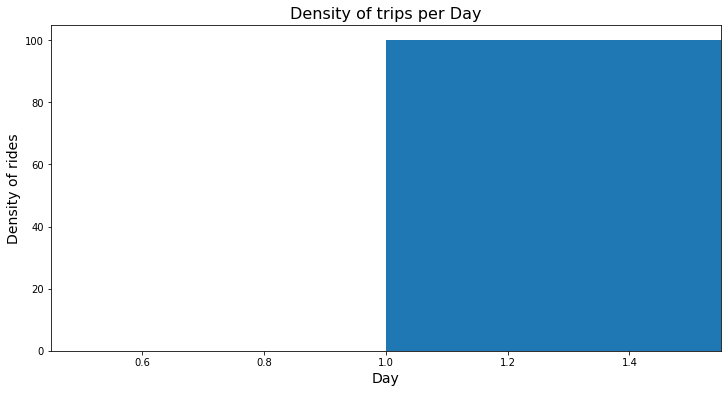

In [7]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of rides')

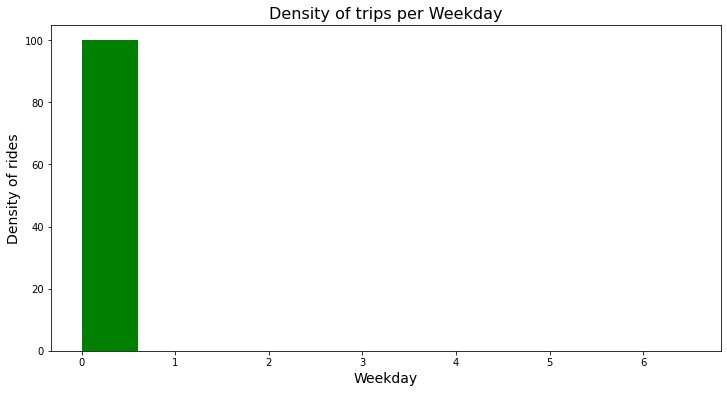

In [8]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "green")
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.

Text(0, 0.5, 'Density of rides')

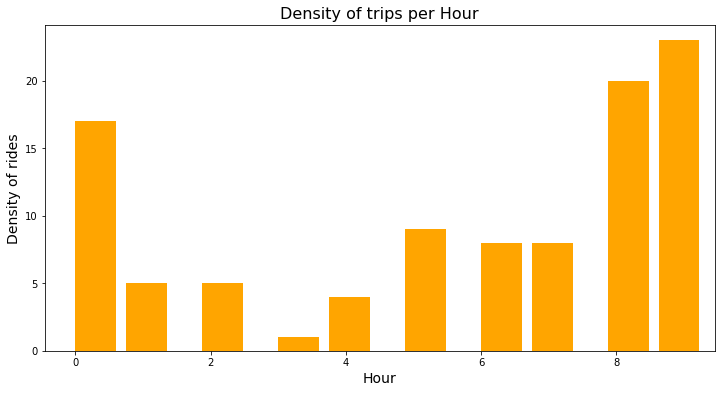

In [9]:
#Visualize the Density of rides per hour
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.

Text(0, 0.5, 'Density of rides')

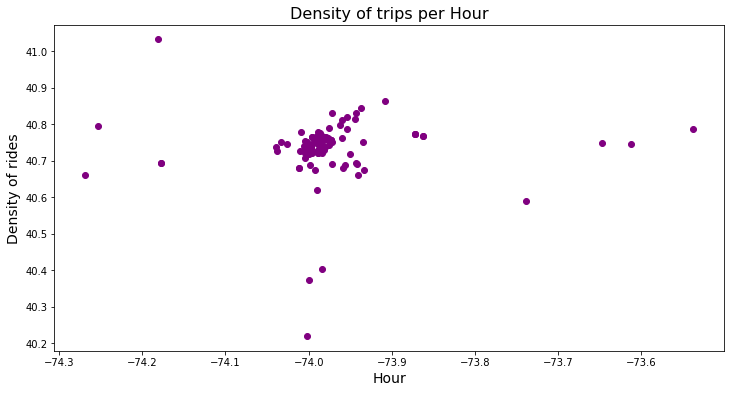

In [10]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_df.Lon
y= uber_df.Lat
plt.scatter(x, y, color= "purple")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.


In [11]:
geolocator = Nominatim(user_agent="coordinateconverter")
location = geolocator.reverse("52.509669, 13.376294")
print(location.address)

Steinecke, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland


In [12]:
px.scatter_mapbox(uber_df, lat="Lat", lon="Lon", zoom=15)

In [13]:
uber_df["Geom"] = uber_df["Lat"].map(str) + "," + uber_df["Lon"].map(str)
uber_df["Geom"][0]

locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)
tqdm.pandas()
uber_df.head(5)
uber_df["Address"] = uber_df["Geom"].progress_apply(rgeocode)


100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


In [14]:
uber_df.head()
uber_df['Country'] = uber_df['Address'].apply(str).str.split(',').str[-1]
uber_df.to_csv('uber_df.csv')
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday,Geom,Address,Country
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0,"40.2201,-74.0021","(Porta, Kingsley Street, Asbury Park, Monmouth...",United States
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0,"40.75,-74.0027","(289, 10th Avenue, Chelsea District, Manhattan...",United States
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0,"40.7559,-73.9864",(42nd Street–Times Square–Port Authority Bus T...,United States
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0,"40.745,-73.9889","(28th Street, Broadway, Manhattan Community Bo...",United States
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0,"40.8145,-73.9444","(2274, Adam Clayton Powell Jr. Boulevard, Harl...",United States
